In [1]:
import json
import matplotlib.pyplot as plt

# 打开 JSON 文件并读取数据
with open('hand_sanitizer_s20m20.json', 'r', encoding='utf-8') as file:
    datas = json.load(file)
    
length_data_list = []
seq_num = []

# 解析 JSON 数据
for data in datas:
    if "wlan.qos" not in data["_source"]["layers"]["wlan"]:
        continue
    if data["_source"]["layers"]["wlan"]["wlan.seq"] in seq_num:
        continue
    seq_num.append(data["_source"]["layers"]["wlan"]["wlan.seq"])
    if data["_source"]["layers"]["wlan"]["wlan.qos"] == "0x0000":
        length_data_list.append((float(data["_source"]["layers"]["frame"]["frame.time_relative"]),
                                 int(data["_source"]["layers"]["frame"]["frame.len"])))

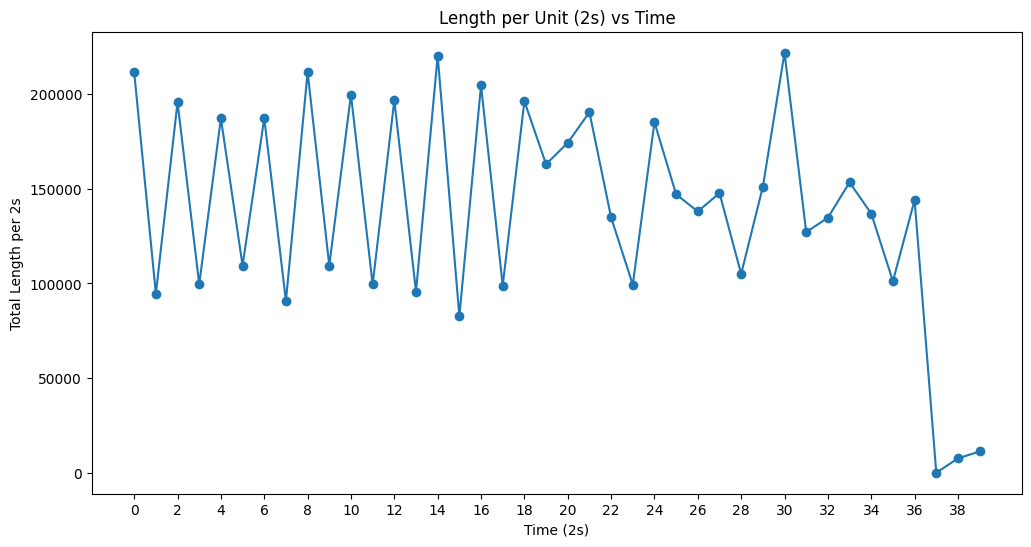

In [3]:
# 计算每20毫秒的长度总和
unit_duration = 1  # 每单位时间为20毫秒
current_unit_start = 0.0  # 当前单位的起始时间
total_length_per_unit = []  # 存储每个时间单位的总长度

current_total_length = 0  # 当前单位时间的总长度
for time, length in length_data_list:
    # 检查数据点是否属于当前的时间区间
    while time >= current_unit_start + unit_duration:
        # 保存当前单位的总长度
        total_length_per_unit.append(current_total_length)
        # 进入下一个时间区间
        current_unit_start += unit_duration
        # 重置当前单位时间的总长度
        current_total_length = 0

    # 累加当前区间内的长度
    current_total_length += length

# 添加最后一个单位的总长度
total_length_per_unit.append(current_total_length)

# 生成时间轴
units = [i * unit_duration for i in range(len(total_length_per_unit))]

plt.figure(figsize=(12, 6))

# 绘制图表
plt.plot(units, total_length_per_unit, marker='o')
plt.xlabel('Time (2s)')
plt.ylabel('Total Length per 2s')
plt.title('Length per Unit (2s) vs Time')

# 设置x轴刻度为2s间隔
plt.xticks(units[::2])

plt.show()


In [2]:
move=0
static=0
for time, length in length_data_list:   
    # print("time: ",time," length: ",length)
    if time<20: static +=1
    else: move +=1
print("static: ",static," move: ",move)

static_length=0
move_length=0
for time, length in length_data_list:
    if time<20:
        static_length += length
    else:
        move_length += length
print("static length: ",static_length)
print("move length: ",move_length)

static:  2187  move:  1808
static length:  3054172
move length:  2510751


In [1]:
import json
import matplotlib.pyplot as plt

# 打开 JSON 文件并读取数据
with open('hand_sanitizer_s20m20_filter.json', 'r', encoding='utf-8') as file:
    datas = json.load(file)
    
length_data_list = []
seq_num = []

# 解析 JSON 数据
for data in datas:
    if data["_source"]["layers"]["wlan"]["wlan.seq"] in seq_num:
        continue
    seq_num.append(data["_source"]["layers"]["wlan"]["wlan.seq"])
    length_data_list.append((float(data["_source"]["layers"]["frame"]["frame.time_relative"]),
                            int(data["_source"]["layers"]["frame"]["frame.len"])))

In [2]:
move=0
static=0
for time, length in length_data_list:   
    # print("time: ",time," length: ",length)
    if time<20: static +=1
    else: move +=1
print("static: ",static," move: ",move)

static_length=0
move_length=0
for time, length in length_data_list:
    if time<20:
        static_length += length
    else:
        move_length += length
print("static length: ",static_length)
print("move length: ",move_length)

static:  2170  move:  1784
static length:  3028681
move length:  2476199


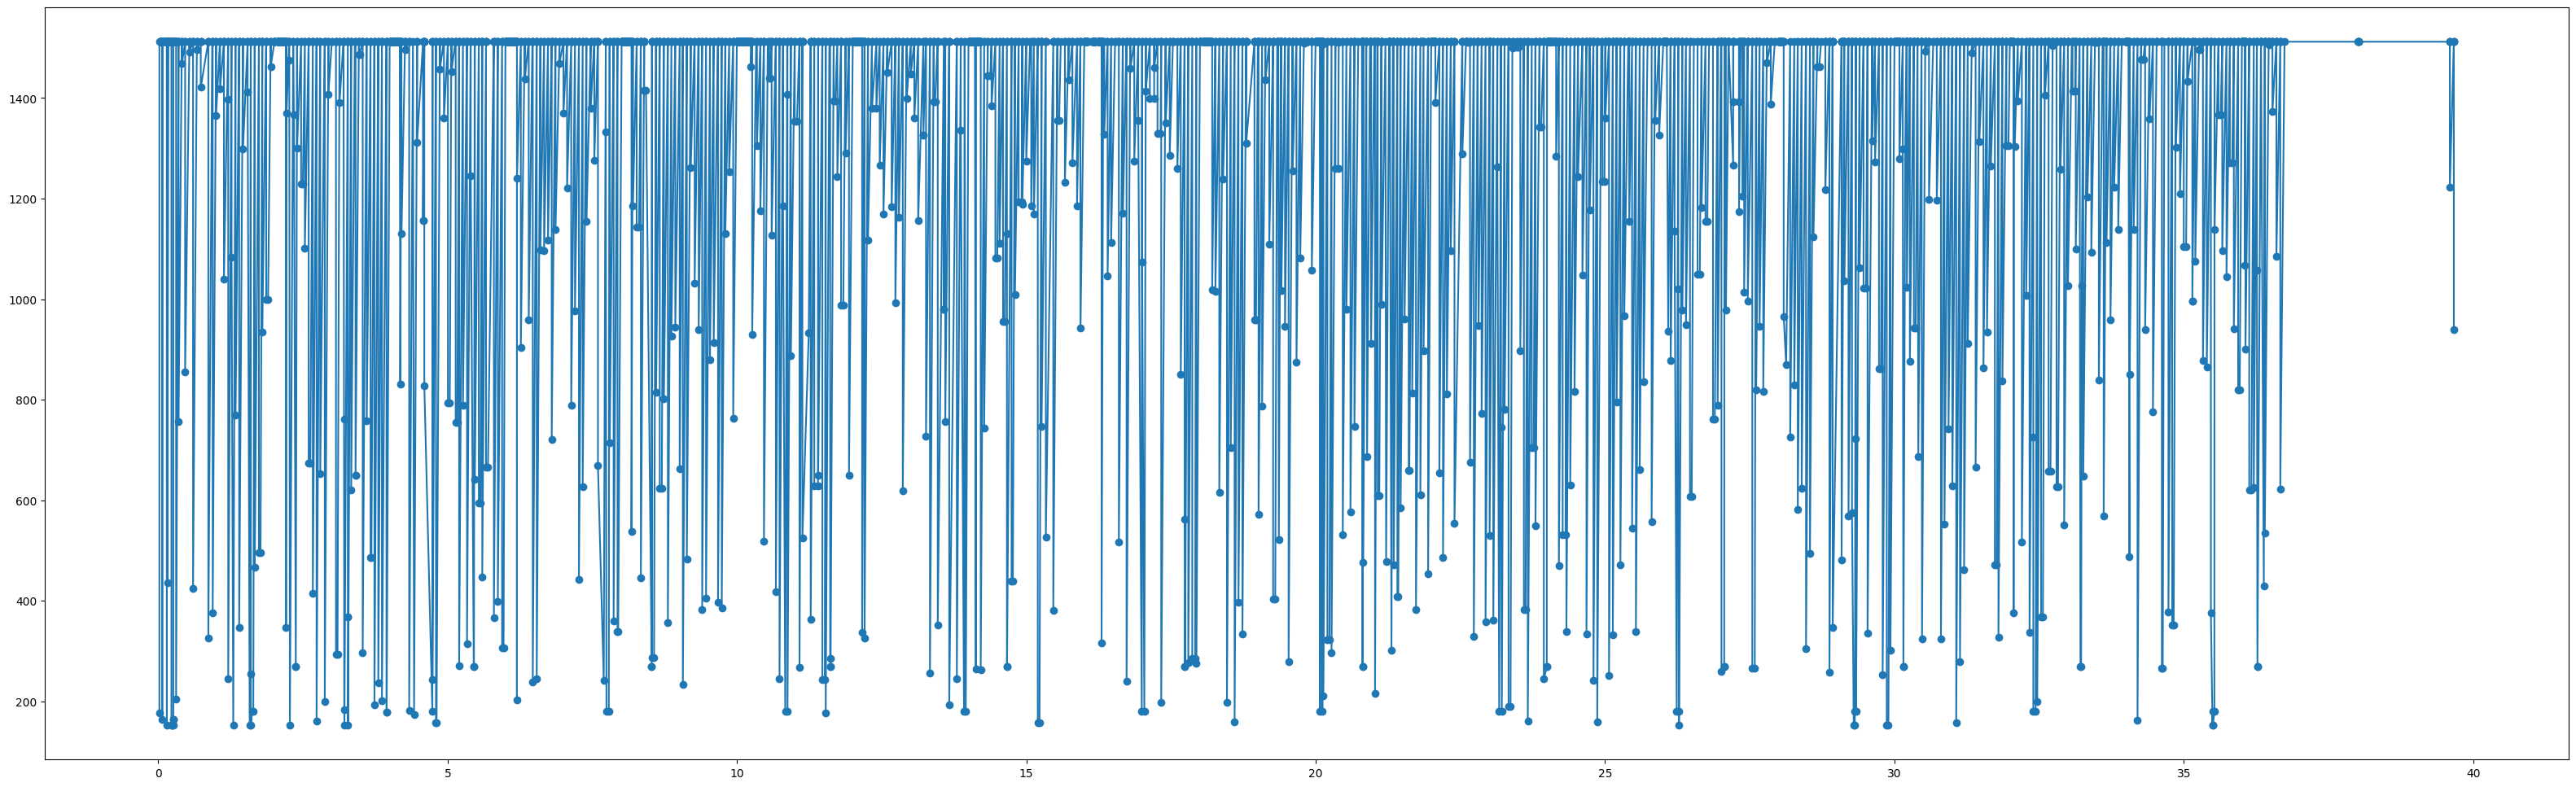

In [7]:
plt.figure(figsize=(40, 12))
length_data_list_x = []
length_data_list_y = []
for time, length in length_data_list:
    length_data_list_x.append(time)
    length_data_list_y.append(length)
# 绘制图表
plt.plot(length_data_list_x, length_data_list_y, marker='o')